In [1]:
### Importing packages

import pandas as pd
from glob import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import starry
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts


np.random.seed(12)
starry.config.lazy = False
starry.config.quiet = True

In [2]:
### Loading the data from Xanyu's files

rotation_period = "r5"

latitude = np.loadtxt("fluxmap_bd/latitude_fluxmap_"+rotation_period+".txt",skiprows=1)
num_lat = len(latitude)

longitude = np.loadtxt("fluxmap_bd/longitude_fluxmap_"+rotation_period+".txt",skiprows=1)
num_long = len(longitude)

time = np.loadtxt("fluxmap_bd/timeout_hour_fluxmap_"+rotation_period+".txt",skiprows=1)
num_time = len(time)

flux_map = np.loadtxt("fluxmap_bd/fluxmap_"+rotation_period+".txt")

In [3]:
### Creating array for the latitude/longitude map

a = np.empty((num_long,num_lat,num_time-1))
b = np.block([longitude,latitude])

In [4]:
### Loop to put values into Lat/Lon array

nn=0
for j in range(num_lat-1):
    for i in range(num_long-1):
        nn += 1
        a[i,j,:] = np.squeeze(flux_map[nn,3:])

In [5]:
### Plotting variable

ntime_plot = 1

In [6]:
### Swap 1st and second column

a=np.transpose(a,(1,0,2))

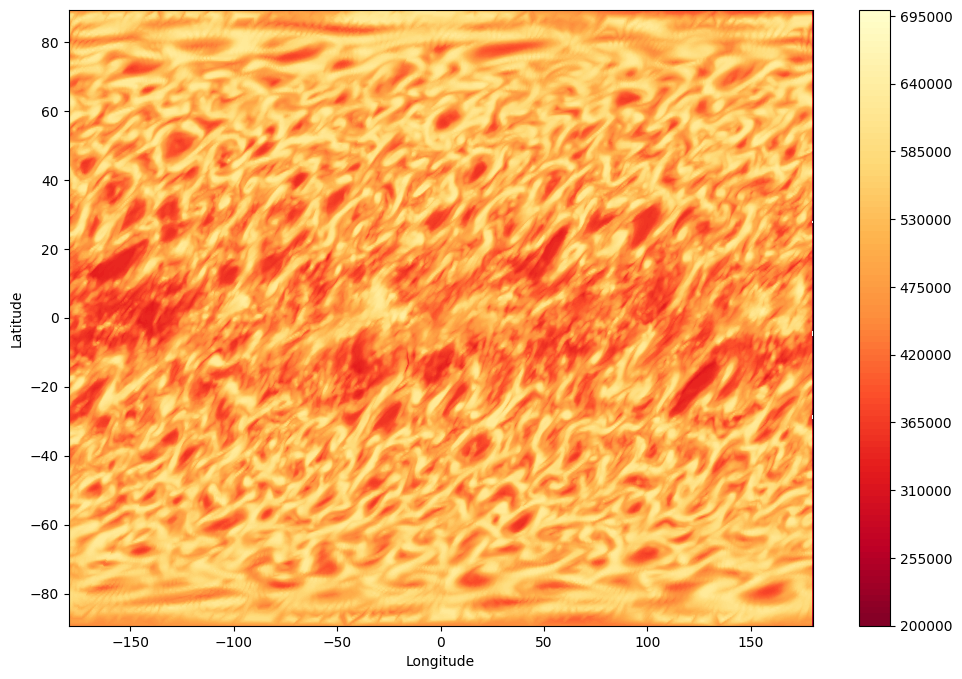

In [7]:
### Plot Xianyu's maps

plt.figure(figsize=(12, 8))
levels = np.linspace(200000, 700000, 101) #n+1 levels
plt.contourf(longitude,latitude,np.squeeze(a[:,:,ntime_plot]),cmap="YlOrRd_r",vmin=200000,vmax=700000,levels=levels)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.clim(200000,700000)
plt.colorbar()
plt.savefig("XianyuStarry/"+str(rotation_period) + "_XianyuMap.jpg")
plt.show()

In [8]:
### Set variable for ydeg

ydeg = 10

In [9]:
### Set projection type: ortho, rect, moll

projection_type = "moll"

In [10]:
### Generate Starry map at selected ydeg

map = starry.Map(ydeg=ydeg)
map.load(maps=b,image=flux_map)
map.show(projection=projection_type,colorbar=True,file= "XianyuStarry/"+str(rotation_period)+"_XianyuMap_Starry_ydeg"+str(ydeg)+projection_type+".jpg")

In [11]:
latitude_flip = np.flip(latitude)

In [12]:
### Intensity function

Intensity = []
for lat in latitude:
    I = map.intensity(lat=lat, lon=longitude)
    Intensity.append(I)

In [20]:
Intensity_Values = []
for i in Intensity:
    for k in i:
        Intensity_Values.append(k)

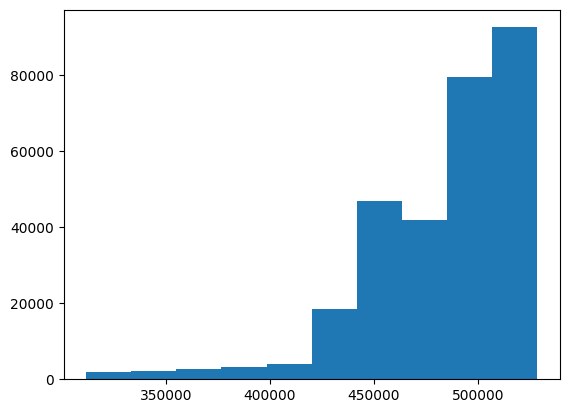

In [22]:
### Plotting Intensity

plt.hist(Intensity_Values)
plt.savefig("XianyuStarry/"+str(rotation_period) + "_XianyuMap_Intensity_Scatter.jpg")
plt.show()

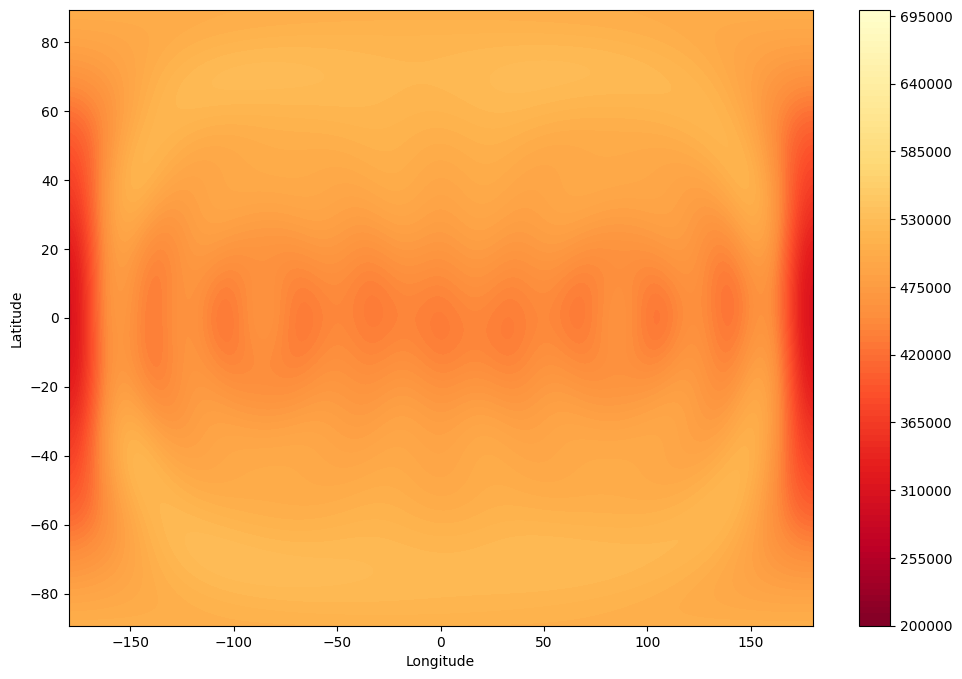

In [18]:
plt.figure(figsize=(12, 8))
plt.contourf(longitude,latitude,Intensity,cmap="YlOrRd_r",vmin=200000,vmax=700000,levels=levels)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.ylim(-40,-20)
plt.clim(200000,700000)
plt.colorbar()
plt.savefig("XianyuStarry/"+str(rotation_period) + "_XianyuMap_Intensity.jpg")
plt.show()